In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import xgboost as xgb
from sklearn.metrics import accuracy_score,recall_score, precision_score, f1_score

In [ ]:
data=pd.read_csv('/content/diabetes.csv')

In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
data.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
cols = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
for c in cols:
    data[c] = data[c].replace(0, data[c].median())

In [ ]:
data.duplicated().sum()

np.int64(0)

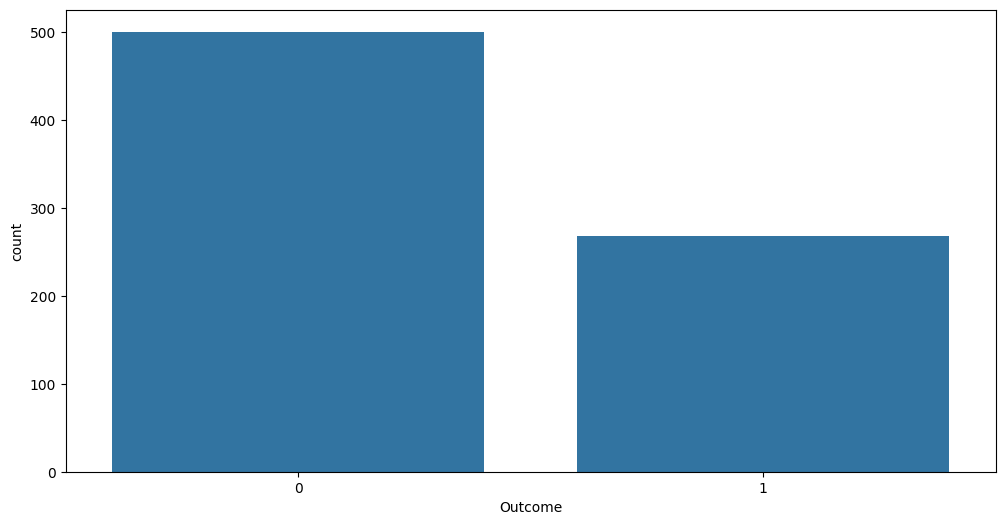

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data=data,x='Outcome')
plt.show()

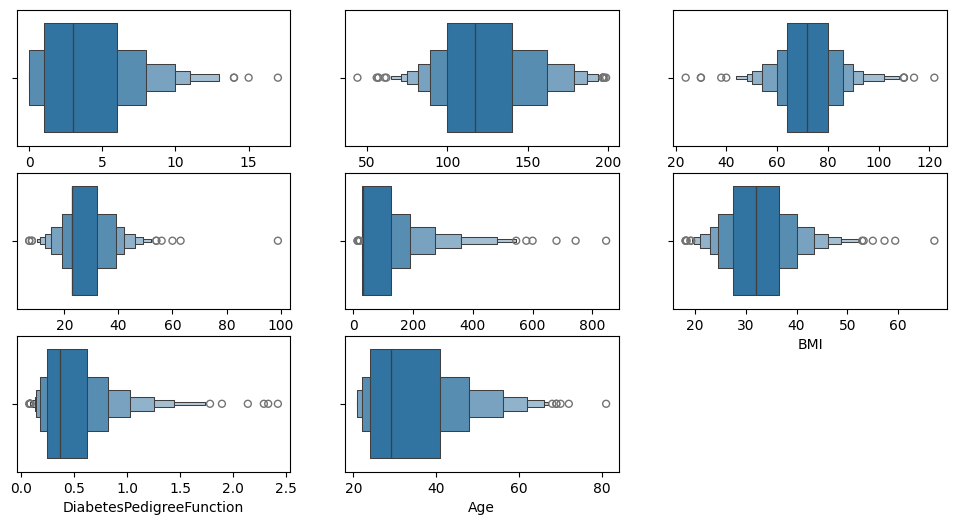

In [ ]:
#outliers
plt.figure(figsize=(12,6))
for i ,col in enumerate(['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']):
  plt.subplot(3,3,i+1)
  sns.boxenplot(data=data,x=col)
plt.show()

In [ ]:

sc_x=StandardScaler()
x=pd.DataFrame(sc_x.fit_transform(data.drop('Outcome',axis=1)),columns=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'])

In [ ]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.866045,-0.031990,0.831114,-0.608201,0.167240,0.468492,1.425995
1,-0.844885,-1.205066,-0.528319,0.180566,-0.608201,-0.851551,-0.365061,-0.190672
2,1.233880,2.016662,-0.693761,-0.469981,-0.608201,-1.331838,0.604397,-0.105584
3,-0.844885,-1.073567,-0.528319,-0.469981,-0.006185,-0.633239,-0.920763,-1.041549
4,-1.141852,0.504422,-2.679076,0.831114,0.695378,1.549885,5.484909,-0.020496


In [ ]:
y=data['Outcome']

In [ ]:
x_train,X_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=42, stratify=y)

In [ ]:
print(x.shape, x_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


In [ ]:
test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(x_train,y_train)

    train_scores.append(knn.score(x_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [ ]:
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [ ]:
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 74.02597402597402 % and k = [8]


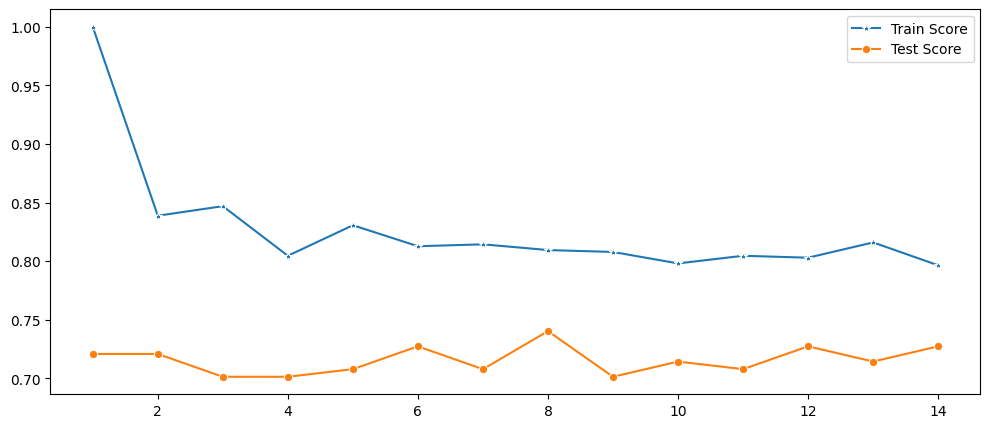

In [ ]:
plt.figure(figsize=(12,5))
p = sns.lineplot(x=range(1,15), y=train_scores, marker='*', label='Train Score')
p = sns.lineplot(x=range(1,15), y=test_scores, marker='o', label='Test Score')

#The best result is captured at k = 8 hence 8 is used for the final model

In [ ]:
knn = KNeighborsClassifier(8)

knn.fit(x_train,y_train)
knn.score(X_test,y_test)

0.7402597402597403

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


<Axes: >

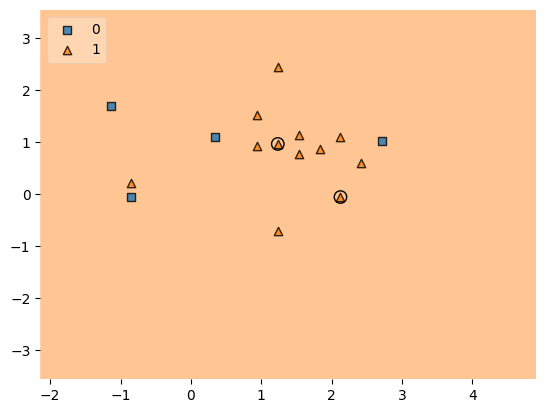

In [ ]:
from mlxtend.plotting import plot_decision_regions

value = 20000
width = 20000
plot_decision_regions(x.values, y.values, clf=knn, legend=2,
                      filler_feature_values={2: value, 3: value, 4: value, 5: value, 6: value, 7: value},
                      filler_feature_ranges={2: width, 3: width, 4: width, 5: width, 6: width, 7: width},
                      X_highlight=X_test.values)

In [ ]:
!pip install mlxtend

In [ ]:
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,88,12,100
1,28,26,54
All,116,38,154


Text(0.5, 23.52222222222222, 'Predicted label')

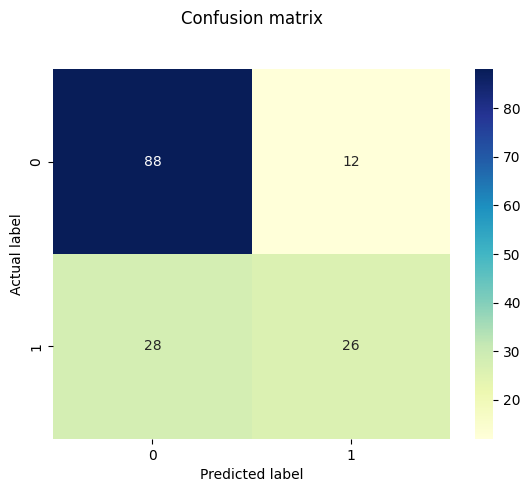

In [ ]:
y_pred = knn.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.88      0.81       100
           1       0.68      0.48      0.57        54

    accuracy                           0.74       154
   macro avg       0.72      0.68      0.69       154
weighted avg       0.73      0.74      0.73       154



In [ ]:
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn, param_grid ,cv=5)
knn_cv.fit(x,y)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7800271623801034
Best Parameters: {'n_neighbors': np.int64(19)}


In [ ]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    max_depth=10,
    min_samples_split=5,
    n_jobs=-1
)

rf_model.fit(x_train, y_train)


y_pred = rf_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print(classification_report(y_test, y_pred))

Accuracy: 0.7468
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       100
           1       0.65      0.59      0.62        54

    accuracy                           0.75       154
   macro avg       0.72      0.71      0.72       154
weighted avg       0.74      0.75      0.74       154



In [ ]:
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print("="*40)
    print(f"Model: {name}")
    print(f"Accuracy:  {acc:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"F1:        {f1:.4f}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred, digits=4))
    return {"Model": name, "Accuracy": acc, "Recall": rec, "Precision": prec, "F1": f1}
results = []

In [ ]:


# Train XGBoost
xgb_model = xgb.XGBClassifier(random_state=42, eval_metric="logloss")
xgb_model.fit(x_train, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test)

# Evaluation
acc_xgb = accuracy_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

print("XGBoost Results:")
print(f"Accuracy: {acc_xgb:.4f}")
print(f"Recall: {recall_xgb:.4f}")
print(f"Precision: {precision_xgb:.4f}")
print(f"F1-score: {f1_xgb:.4f}")


XGBoost Results:
Accuracy: 0.7338
Recall: 0.5926
Precision: 0.6275
F1-score: 0.6095


In [ ]:
results.append(evaluate_model("RandomForest", rf_model, X_test, y_test))
results.append(evaluate_model("GridSearch_KNN", knn_cv, X_test, y_test))

# Train XGBoost
xgb_model = xgb.XGBClassifier(random_state=42, eval_metric="logloss")
xgb_model.fit(x_train, y_train)

results.append(evaluate_model("XGBoost", xgb_model, X_test, y_test))

Model: RandomForest
Accuracy:  0.7468
Recall:    0.5926
Precision: 0.6531
F1:        0.6214
Confusion Matrix:
 [[83 17]
 [22 32]]
Classification Report:
               precision    recall  f1-score   support

           0     0.7905    0.8300    0.8098       100
           1     0.6531    0.5926    0.6214        54

    accuracy                         0.7468       154
   macro avg     0.7218    0.7113    0.7156       154
weighted avg     0.7423    0.7468    0.7437       154

Model: GridSearch_KNN
Accuracy:  0.7922
Recall:    0.6296
Precision: 0.7391
F1:        0.6800
Confusion Matrix:
 [[88 12]
 [20 34]]
Classification Report:
               precision    recall  f1-score   support

           0     0.8148    0.8800    0.8462       100
           1     0.7391    0.6296    0.6800        54

    accuracy                         0.7922       154
   macro avg     0.7770    0.7548    0.7631       154
weighted avg     0.7883    0.7922    0.7879       154

Model: XGBoost
Accuracy:  0.7338
Rec

In [ ]:
summary = pd.DataFrame(results)
print("\n==== Summary Results ====")
print(summary.sort_values(by="Recall", ascending=False).reset_index(drop=True))


==== Summary Results ====
            Model  Accuracy    Recall  Precision        F1
0  GridSearch_KNN  0.792208  0.629630   0.739130  0.680000
1    RandomForest  0.746753  0.592593   0.653061  0.621359
2         XGBoost  0.733766  0.592593   0.627451  0.609524


In [159]:
from google.colab import files
# Replace 'Your_Notebook_Name.ipynb' with the actual name of your notebook file
files.download('')

FileNotFoundError: Cannot find file: diabetes.csvUntitled18.ipynb

In [158]:
!ls /content/

diabetes.csv  sample_data
